# Strategic Thinking Final CA3 - Capstone Project 


- Github Link : https://github.com/CCT-Dublin/ca1-capstone-project-proposal-Aline-Menezes-Silva

## Title: Sales Prediction 
### Optimising Sales Performance for a US Candy Distributor


## Problem Statement:
A US-based candy distributor struggles to maximise sales and profits due to inefficient logistics, uneven regional performance, and unclear demand patterns. By analysing customer locations, factory shipments, sales orders, and product details, this project will identify key opportunities to improve revenue—such as predicting demand more accurately, targeting high-value customer groups, and optimising delivery routes to reduce costs. The goal is to provide actionable insights that enhance sales performance while cutting unnecessary expenses.


To increase the Superstore sales, superstore gave us a task to understand what segments, regions, cities or customers they should be focusing on. The goal is to give practical insights to improve profit based on sales.
In the dynamic world of retail, forecasting sales accurately is a critical aspect of optimizing operations, managing inventory, and ensuring profitability. This project revolves around a retail dataset spanning four years from a global superstore. This will done using EDA and Regression Technique

## Data Description

- US Candy Distributor: 
The dataset includes Sales and geospatial factory to customer shipment data for a US national candy distributor, inlcuding information around customer & factory locations, sales orders & goals and product details.

- Candy_Products.csv
- Candy_Sales.csv


#### Data Dictionary 

Most of the fields are self-explanatory.

- Row ID = Unique row identifier
- Order ID = Unique order identifier
- Order Date = Date of order
- Ship Date = Date of shipment
- Ship Mode = Shipping method of order
- Customer ID = Unique customer identifier
- Country/Region = Country or region of customer
- City = City of customer
- State/Province = State/province of customer
- Postal Code = Postal code / zip code of customer
- Division = Product division
- Region = Region of customer
- Product ID = Unique product identifier
- Product Name = Product long name
- Sales = otal sales value of order
- Units = Total units of order
- Gross = Profit	Gross profit of order ( Sales - Cost )
- Cost = Cost to manufacture
- Factory = Factory Name



## Objective
Condut a data anaysis, performing EDA and Predict the sales by using Regression ML algorithms!

## Solution:
Perform EDA (Data Analysis,Data Visualization, Data Cleaning) to understand the data and to clean the dataset for further process
Perform data preprocessing
Build pipeline to train and test the ML Regression model
Model Evaluation
Conclusion

## Import Libraries 

plt.savefig("sales_qq_comparison.png", dpi=300, bbox_inches='tight')

In [12]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR         
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
import time
from sklearn.linear_model import LassoLars
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns # visualisation, we can get the dataset for demonstration
import pandas as pd # computing numbers/data
import numpy as np # computing numbers/data
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score #
from sklearn.preprocessing import LabelEncoder, StandardScaler # handling categorical data, feature scaling
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import missingno as msno


import warnings
warnings.filterwarnings("ignore")

In [13]:
pd.set_option('display.max_columns', None) 

## Reading the Datasets:

In [15]:
candy_products = pd.read_csv("Candy_Products.csv")
candy_products.head(5)

,Division,Product Name,Factory,Product ID,Unit Price,Unit Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.00
1,Chocolate,Wonka Bar - Fudge Mallows,Lot's O' Nuts,CHO-FUD-51000,3.60,1.20
2,Chocolate,Wonka Bar -Scrumdiddlyumptious,Lot's O' Nuts,CHO-SCR-58000,3.60,1.10
3,Chocolate,Wonka Bar - Milk Chocolate,Wicked Choccy's,CHO-MIL-31000,3.25,1.14
4,Chocolate,Wonka Bar - Triple Dazzle Caramel,Wicked Choccy's,CHO-TRI-54000,3.75,1.30


In [16]:
candy_sales = pd.read_csv("Candy_Sales.csv")
candy_sales.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,1209,US-2021-147900-OTH-LIC-15000,23 09 2021,21 10 2021,Standard Class,147900.0,United States,Lakewood,Ohio,44107,Free Sugar,Atlantic,OTH-LIC-15000,Lickable Wallpaper,180.0,9,90.0,90.0
1,8535,US-2024-140326-OTH-LIC-15000,4 09 2024,27 09 2024,First Class,140326.0,United States,Chicago,Illinois,60653,Free Sugar,Interior,OTH-LIC-15000,Lickable Wallpaper,180.0,9,90.0,90.0


## Merging the two Datasets:

In [18]:
#Merging The Sales and Products Datasets based on Product ID (to extract the Factory Name)

candy_df = pd.merge(candy_products, candy_sales, how='left', on='Product ID')
candy_df.head(5)

,Division_x,Product Name_x,Factory,Product ID,Unit Price,Unit Cost,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division_y,Region,Product Name_y,Sales,Units,Gross Profit,Cost
0,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,177,US-2021-158337-CHO-NUT-13000,11 03 2021,4 04 2021,Second Class,158337.0,United States,New York City,New York,10024,Chocolate,Atlantic,Wonka Bar - Nutty Crunch Surprise,48.86,14,34.86,14.0
1,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,1979,US-2021-163447-CHO-NUT-13000,27 12 2021,23 01 2022,Standard Class,163447.0,United States,New York City,New York,10011,Chocolate,Atlantic,Wonka Bar - Nutty Crunch Surprise,48.86,14,34.86,14.0
2,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,2882,US-2022-103135-CHO-NUT-13000,24 07 2022,18 08 2022,Standard Class,103135.0,United States,Louisville,Kentucky,40214,Chocolate,Gulf,Wonka Bar - Nutty Crunch Surprise,48.86,14,34.86,14.0
3,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,6540,US-2023-103674-CHO-NUT-13000,6 12 2023,1 01 2024,Standard Class,103674.0,United States,Los Angeles,California,90032,Chocolate,Pacific,Wonka Bar - Nutty Crunch Surprise,48.86,14,34.86,14.0
4,Chocolate,Wonka Bar - Nutty Crunch Surprise,Lot's O' Nuts,CHO-NUT-13000,3.49,1.0,6038,US-2023-116596-CHO-NUT-13000,27 10 2023,22 11 2023,Standard Class,116596.0,United States,New York City,New York,10011,Chocolate,Atlantic,Wonka Bar - Nutty Crunch Surprise,48.86,14,34.86,14.0


In [19]:
# Dropping duplicated columns (keeping sales dataset versions)

candy_df = candy_df.drop(['Division_y', 'Product Name_y','Unit Price', 'Unit Cost'], axis=1)

# Renaming columns

candy_df = candy_df.rename(columns={
    'Division_x': 'Division',
    'Product Name_x': 'Product Name'
})

## Data Preprocessing:

#### - Check the feature details 

In [22]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10189 entries, 0 to 10188
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Division        10189 non-null  object 
 1   Product Name    10189 non-null  object 
 2   Factory         10189 non-null  object 
 3   Product ID      10189 non-null  object 
 4   Row ID          10189 non-null  int64  
 5   Order ID        10189 non-null  object 
 6   Order Date      10189 non-null  object 
 7   Ship Date       10189 non-null  object 
 8   Ship Mode       10189 non-null  object 
 9   Customer ID     10179 non-null  float64
 10  Country/Region  10189 non-null  object 
 11  City            10189 non-null  object 
 12  State/Province  10189 non-null  object 
 13  Postal Code     10189 non-null  object 
 14  Region          10176 non-null  object 
 15  Sales           10168 non-null  float64
 16  Units           10189 non-null  int64  
 17  Gross Profit    10189 non-null 

##### Dataset Overview 

The dataset contains 10,194 entries of sales transactions with 19 columns, including order details, customer information, product details and financial metrics like Sales, Units, Gross Profit and Cost. Most columns are complete, but Customer ID, Region, and Sales have a few missing values . The data consists of mixed types object (string) columns,float64 (numeric), and int.  columns—and primarily tracks sales operations, for a retail or manufacturing business, with geographic and product-specific breakdowns.

#### - Check shape of data

In [25]:
candy_df.shape

(10189, 19)

#### - Missing values

In [27]:
#Checking Null Values

candy_df.isnull().sum()

Division           0
Product Name       0
Factory            0
Product ID         0
Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID       10
Country/Region     0
City               0
State/Province     0
Postal Code        0
Region            13
Sales             21
Units              0
Gross Profit       0
Cost               0
dtype: int64

<Figure size 800x400 with 0 Axes>

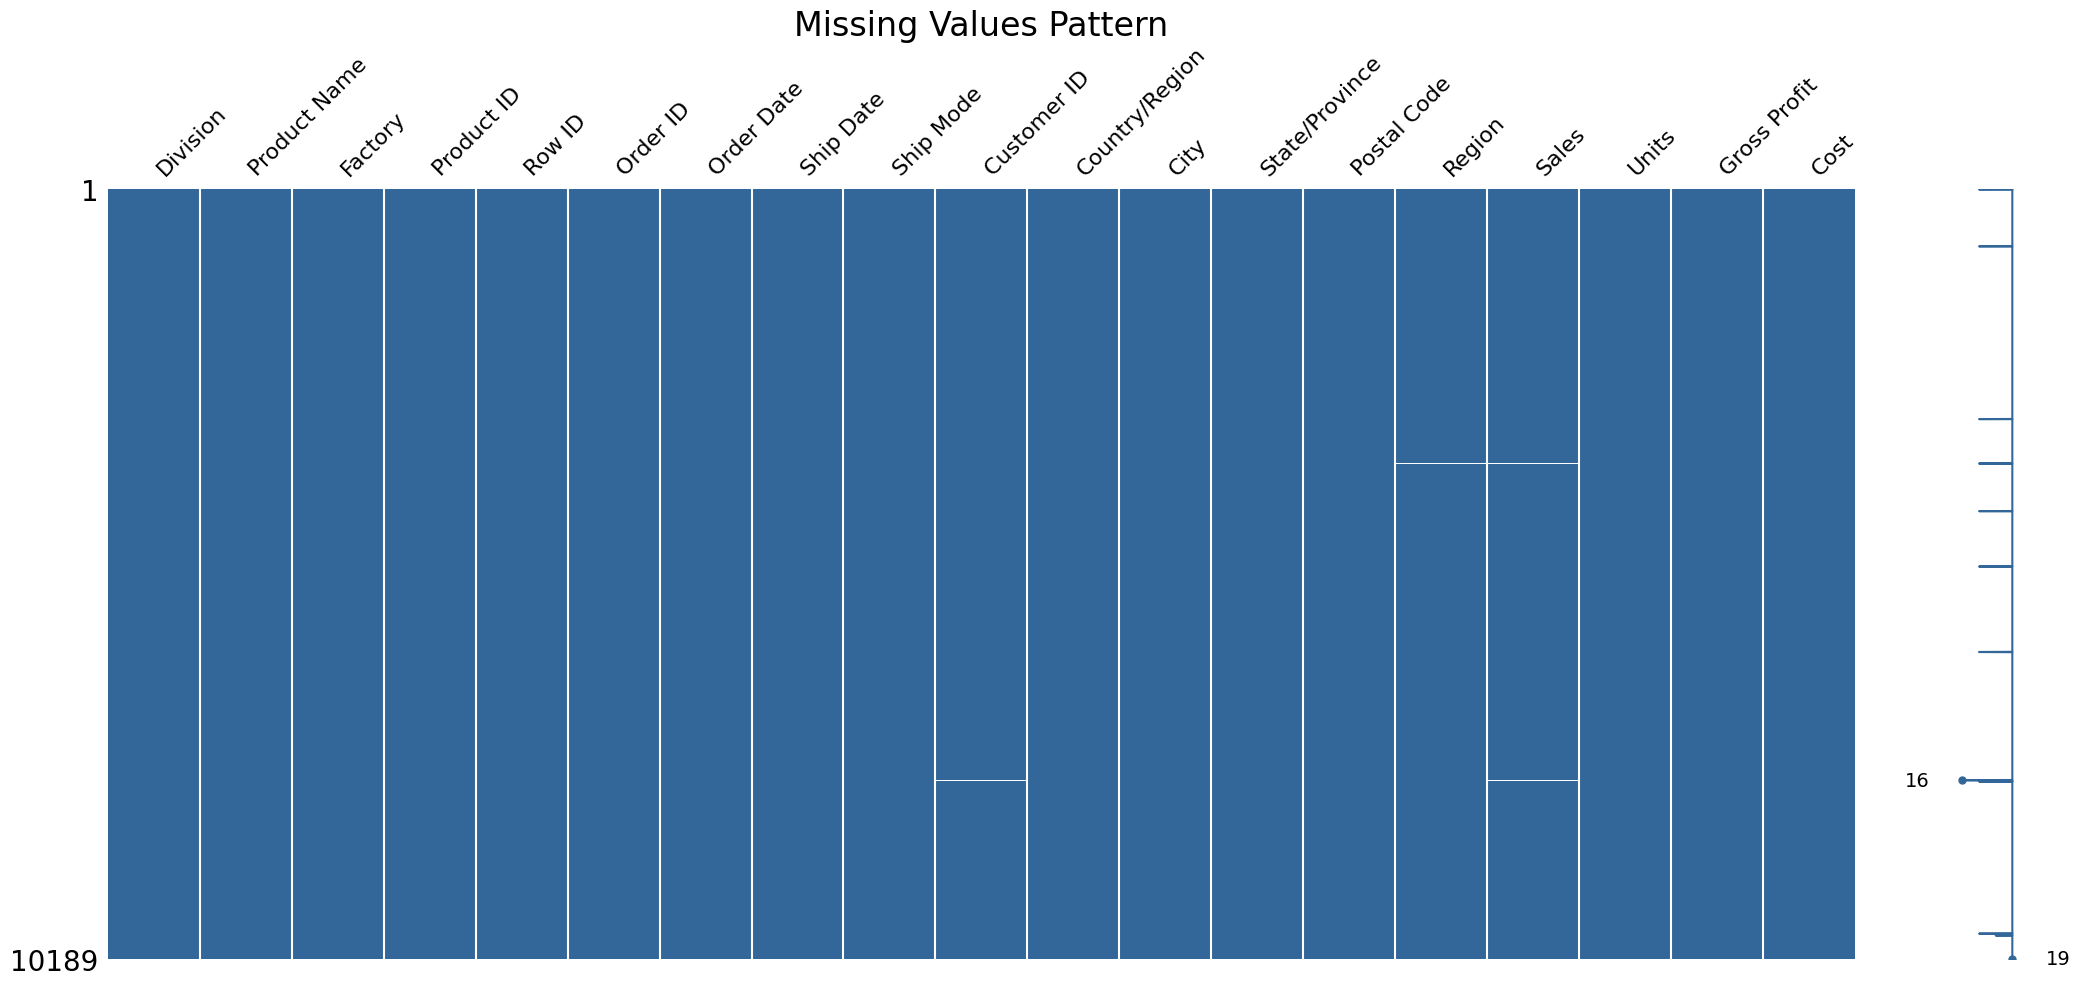

In [28]:
plt.figure(figsize=(8, 4))
msno.matrix(candy_df, color=(0.2, 0.4, 0.6)) 
plt.title('Missing Values Pattern', size=24)
plt.show()

#### - Handlying Missing Values

Since Customer ID , Region and Sales have very few missing values (<5% of the dataset), dropping rows is a safe and efficient strategy to maintain data integrity without significant loss.

In [30]:
candy_df = candy_df.dropna(subset=['Customer ID', 'Region', 'Sales'])

In [31]:
candy_df.isnull().sum()

Division          0
Product Name      0
Factory           0
Product ID        0
Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Country/Region    0
City              0
State/Province    0
Postal Code       0
Region            0
Sales             0
Units             0
Gross Profit      0
Cost              0
dtype: int64

#### - Drop Unwanted Features:

- Row ID: Arbitrary index (likely redundant with pandas' built-in index).
- Order ID:	Is actually a combination of Country + year ordered + CustomerID + ProductID. 
- Postal Code:	
- City: it might overlap with State/Province.


In [33]:
candy_df.drop(columns=['Row ID', 'Order ID', 'Postal Code', 'City'], inplace=True)

#### - Rename Columns and atibuites for readibility: 

In [35]:
candy_df = candy_df.rename(columns={
    'Division': 'Category',
    'Product Name': 'Product',
    'Product ID': 'ProductID',
    'Order Date': 'Ordered',
    'Ship Date': 'Shipped',
    'Ship Mode': 'Shipping',
    'Customer ID': 'CustomerID',
    'Country/Region': 'Country',
    'State/Province': 'State',
    'Units': 'Qty',
    'Gross Profit': 'Profit',
    'Cost': 'UnitCost'
})


In [36]:
## To remove all hyphens (-) from the Product column and replace them with spaces

candy_df['Product'] = candy_df['Product'].str.replace('-', ' ')

In [37]:
## Extracts only the numeric portion of Column ProductID

candy_df['ProductID'] = candy_df['ProductID'].str.extract(r'(\d+)')[0]

In [38]:
candy_df.head(5)

,Category,Product,Factory,ProductID,Ordered,Shipped,Shipping,CustomerID,Country,State,Region,Sales,Qty,Profit,UnitCost
0,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,11 03 2021,4 04 2021,Second Class,158337.0,United States,New York,Atlantic,48.86,14,34.86,14.0
1,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,27 12 2021,23 01 2022,Standard Class,163447.0,United States,New York,Atlantic,48.86,14,34.86,14.0
2,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,24 07 2022,18 08 2022,Standard Class,103135.0,United States,Kentucky,Gulf,48.86,14,34.86,14.0
3,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,6 12 2023,1 01 2024,Standard Class,103674.0,United States,California,Pacific,48.86,14,34.86,14.0
4,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,27 10 2023,22 11 2023,Standard Class,116596.0,United States,New York,Atlantic,48.86,14,34.86,14.0


#### - Check and drop Duplicate data

In [40]:
dup = candy_df.duplicated().sum()
print(f"Number of duplicated rows: {dup}")


Number of duplicated rows: 312


In [41]:
duplicated = candy_df[candy_df.duplicated(keep='first')]
duplicated.head(5)

,Category,Product,Factory,ProductID,Ordered,Shipped,Shipping,CustomerID,Country,State,Region,Sales,Qty,Profit,UnitCost
139,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,24 12 2022,17 01 2023,First Class,124653.0,United States,New York,Atlantic,24.43,7,17.43,7.0
233,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,29 12 2021,25 01 2022,Standard Class,110786.0,United States,California,Pacific,20.94,6,14.94,6.0
249,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,12 08 2021,6 09 2021,Standard Class,156244.0,United States,Florida,Gulf,20.94,6,14.94,6.0
301,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,19 03 2024,12 04 2024,First Class,105410.0,United States,California,Pacific,20.94,6,14.94,6.0
364,Chocolate,Wonka Bar Nutty Crunch Surprise,Lot's O' Nuts,13000,19 12 2021,13 01 2022,First Class,162992.0,United States,California,Pacific,17.45,5,12.45,5.0


In [42]:
candy_df_drop = candy_df.drop_duplicates()
remaining_duplicates = candy_df_drop.duplicated().sum()
print(f"Duplicates remaining after drop: {remaining_duplicates}")


Duplicates remaining after drop: 0


#### - Convert Data Type

In [44]:
# Convert CustomerID float to int (removes .0 for non-null values) and then to string

candy_df['CustomerID'] = candy_df['CustomerID'].astype('Int64').astype(str)


In [45]:
candy_df['Ordered'] = pd.to_datetime(candy_df['Ordered'], dayfirst=True)
candy_df['Shipped'] = pd.to_datetime(candy_df['Shipped'], dayfirst=True)


In [46]:
print(f" start_date is from {candy_df['Ordered'].min()} - end_date is to {candy_df['Ordered'].max()}")

 start_date is from 2021-01-03 00:00:00 - end_date is to 2024-12-30 00:00:00


In [47]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10168 entries, 0 to 10188
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Category    10168 non-null  object        
 1   Product     10168 non-null  object        
 2   Factory     10168 non-null  object        
 3   ProductID   10168 non-null  object        
 4   Ordered     10168 non-null  datetime64[ns]
 5   Shipped     10168 non-null  datetime64[ns]
 6   Shipping    10168 non-null  object        
 7   CustomerID  10168 non-null  object        
 8   Country     10168 non-null  object        
 9   State       10168 non-null  object        
 10  Region      10168 non-null  object        
 11  Sales       10168 non-null  float64       
 12  Qty         10168 non-null  int64         
 13  Profit      10168 non-null  float64       
 14  UnitCost    10168 non-null  float64       
dtypes: datetime64[ns](2), float64(3), int64(1), object(9)
memory usage: 1.2+ MB

#### - Feature engineering 

In [49]:
# Order Processing Time:

candy_df['Delivery_Time'] = (candy_df['Shipped'] - candy_df['Ordered']).dt.days

In [50]:
# Profit Margin:

candy_df['Profit%'] = (candy_df['Profit'] / candy_df['Sales']) * 100

In [51]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10168 entries, 0 to 10188
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Category       10168 non-null  object        
 1   Product        10168 non-null  object        
 2   Factory        10168 non-null  object        
 3   ProductID      10168 non-null  object        
 4   Ordered        10168 non-null  datetime64[ns]
 5   Shipped        10168 non-null  datetime64[ns]
 6   Shipping       10168 non-null  object        
 7   CustomerID     10168 non-null  object        
 8   Country        10168 non-null  object        
 9   State          10168 non-null  object        
 10  Region         10168 non-null  object        
 11  Sales          10168 non-null  float64       
 12  Qty            10168 non-null  int64         
 13  Profit         10168 non-null  float64       
 14  UnitCost       10168 non-null  float64       
 15  Delivery_Time  10168 non

### - Check the Normality of the dataset 

Using Histogram with KDE and Q-Q Plot, along with Log Transformation to address skewness if needed:

#### - Numerical Features Distribuition:

In [54]:
Ncolumns = ['Sales', 'UnitCost', 'Profit', 'Qty', 'Delivery_Time', 'Profit%']

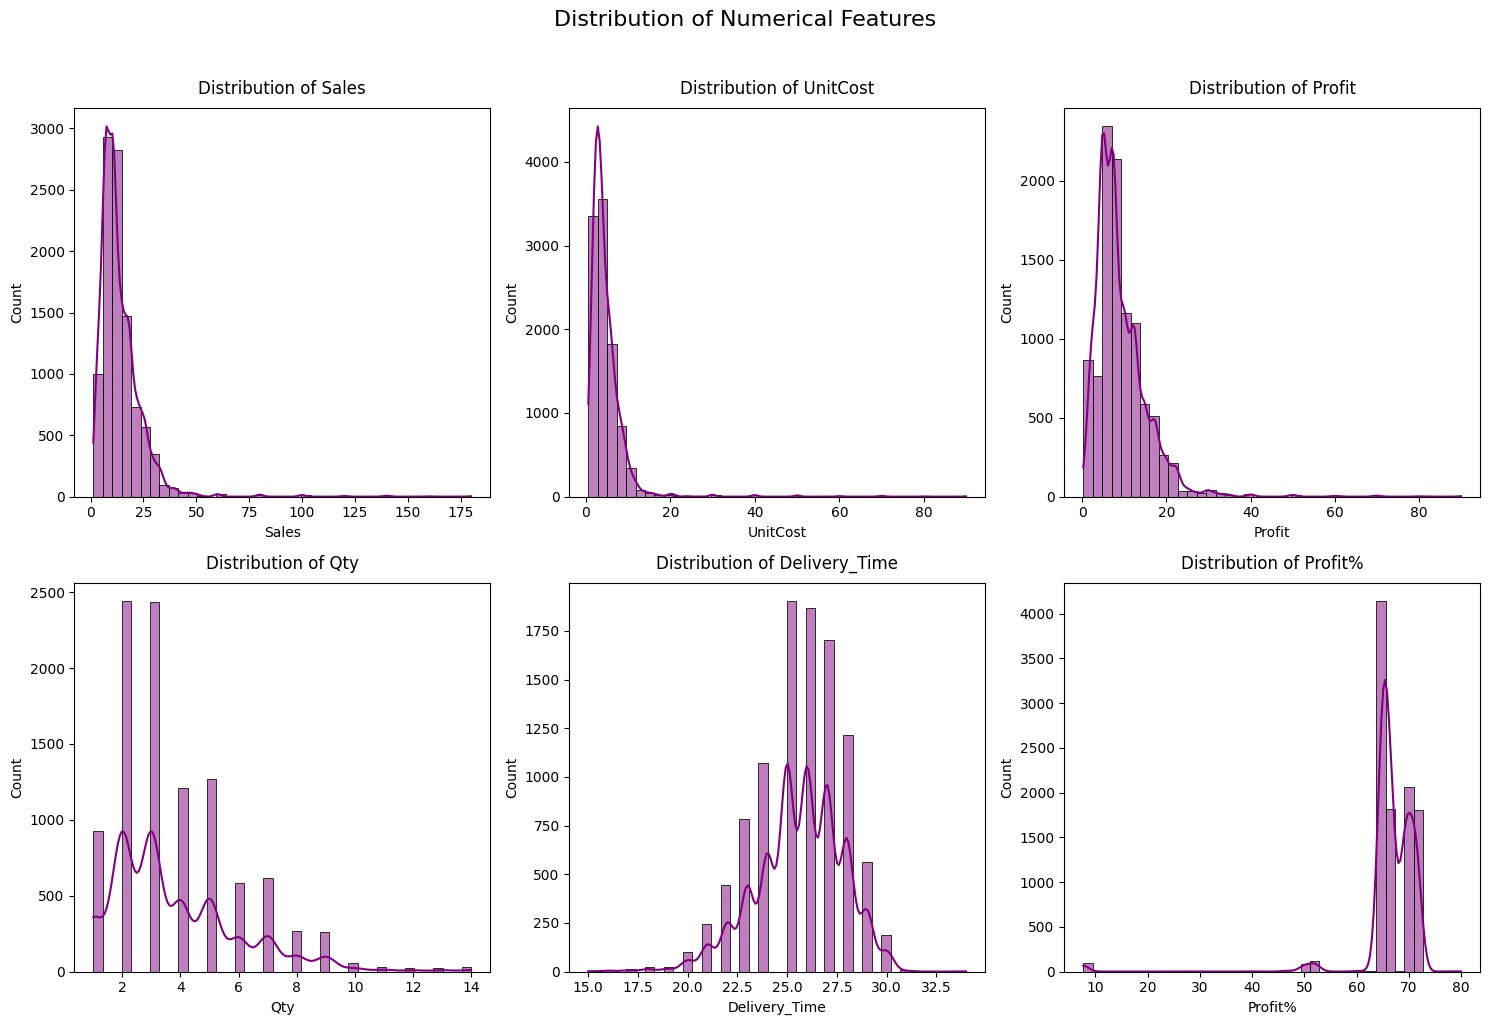

In [55]:
# Subplots with adjusted bin counts and proper title spacing
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)  # y=1.02 adds vertical spacing

# Plot distributions with fewer bins
for i, col in enumerate(Ncolumns):
    sns.histplot(candy_df[col], 
                 kde=True, 
                 bins=40,
                 ax=axes[i//3, i%3], 
                 color='purple')
    axes[i//3, i%3].set_title(f'Distribution of {col}', pad=10)

# Adjust layout with additional top padding
plt.subplots_adjust(top=0.85)  # Creates space between suptitle and subplots (0.9 is default)
plt.tight_layout()
plt.show()

#### -Log Transformation to treat data Skew:

Log Transformation as the dataset contain is midle size (10K) and is right skewed. As we already see in the Data Visualization part, the Sales column having some outliers so it is important to handle this

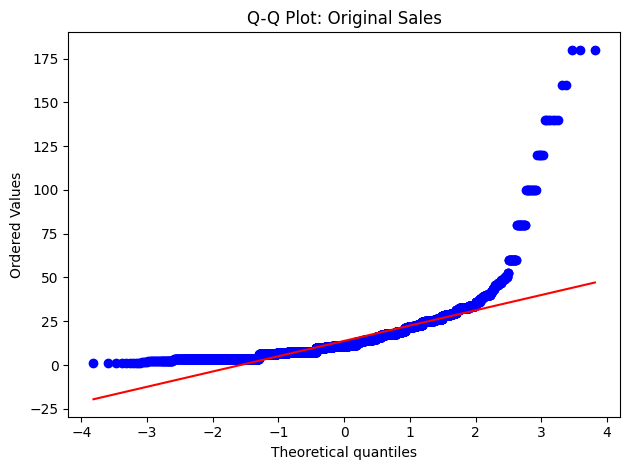

In [57]:
# Create figure with Q-Q plots

# Simple Q-Q plot in one line
stats.probplot(candy_df['Sales'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Original Sales')
plt.tight_layout()
plt.show()

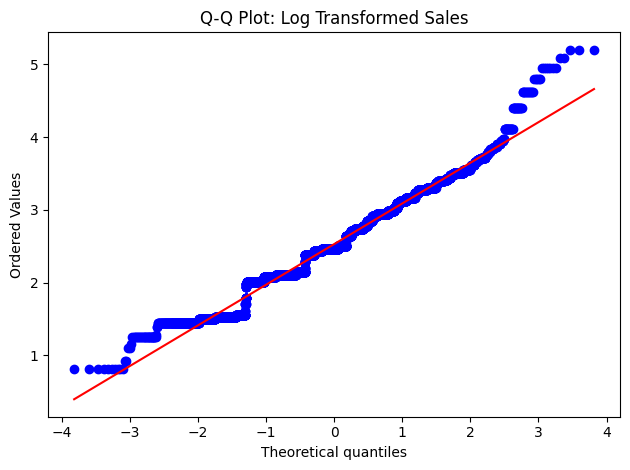

In [58]:
candy_df['Sales'] = np.log1p(candy_df['Sales'])

# Simple Q-Q plot in one line
stats.probplot(candy_df['Sales'], dist="norm", plot=plt)
plt.title('Q-Q Plot: Log Transformed Sales')
plt.tight_layout()
plt.show()

## Descriptive analysis

#### - Check Unique Values for each variable

In [61]:
# number of unique values per column

unique = candy_df.nunique()

print("Number of unique values in each column:")
print(unique)

Number of unique values in each column:
Category            3
Product            15
Factory             5
ProductID          15
Ordered          1242
Shipped          1306
Shipping            4
CustomerID       5039
Country             2
State              59
Region              4
Sales              90
Qty                14
Profit            117
UnitCost           92
Delivery_Time      18
Profit%            24
dtype: int64


##### Numerical Features:

In [63]:
candy_df[['Sales', 'UnitCost', 'Profit', 'Qty', 'Delivery_Time', 'Profit%']].describe()

,Sales,UnitCost,Profit,Qty,Delivery_Time,Profit%
count,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000,10168.000000
mean,2.528318,4.697264,9.116251,3.785700,25.609363,66.507513
std,0.564735,4.603485,6.303796,2.214877,2.183037,6.762583
min,0.810930,0.600000,0.250000,1.000000,15.000000,7.692308
25%,2.104134,2.400000,4.900000,2.000000,24.000000,65.333333
50%,2.468100,3.600000,7.470000,3.000000,26.000000,66.666667
75%,2.944439,5.700000,12.250000,5.000000,27.000000,69.444444
max,5.198497,90.000000,90.000000,14.000000,34.000000,80.000000


##### Categorical Features:

In [65]:
candy_df.describe(include= object)

,Category,Product,Factory,ProductID,Shipping,CustomerID,Country,State,Region
count,10168,10168,10168,10168,10168,10168,10168,10168,10168
unique,3,15,5,15,4,5039,2,59,4
top,Chocolate,Wonka Bar Milk Chocolate,Lot's O' Nuts,31000,Standard Class,115238,United States,California,Pacific
freq,9824,2126,5685,2126,6105,24,9969,1997,3240


In [66]:
candy_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10168 entries, 0 to 10188
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Category       10168 non-null  object        
 1   Product        10168 non-null  object        
 2   Factory        10168 non-null  object        
 3   ProductID      10168 non-null  object        
 4   Ordered        10168 non-null  datetime64[ns]
 5   Shipped        10168 non-null  datetime64[ns]
 6   Shipping       10168 non-null  object        
 7   CustomerID     10168 non-null  object        
 8   Country        10168 non-null  object        
 9   State          10168 non-null  object        
 10  Region         10168 non-null  object        
 11  Sales          10168 non-null  float64       
 12  Qty            10168 non-null  int64         
 13  Profit         10168 non-null  float64       
 14  UnitCost       10168 non-null  float64       
 15  Delivery_Time  10168 non

## Exploratory Data Analysis EDA

#### - Annual Sales 


In [70]:
candy_df['Year'] = candy_df['Ordered'].dt.year
annual_sales = candy_df.groupby('Year')['Sales'].sum().reset_index()
annual_sales

,Year,Sales
0,2021,5185.990822
1,2022,5363.978276
2,2023,6639.047224
3,2024,8518.921312


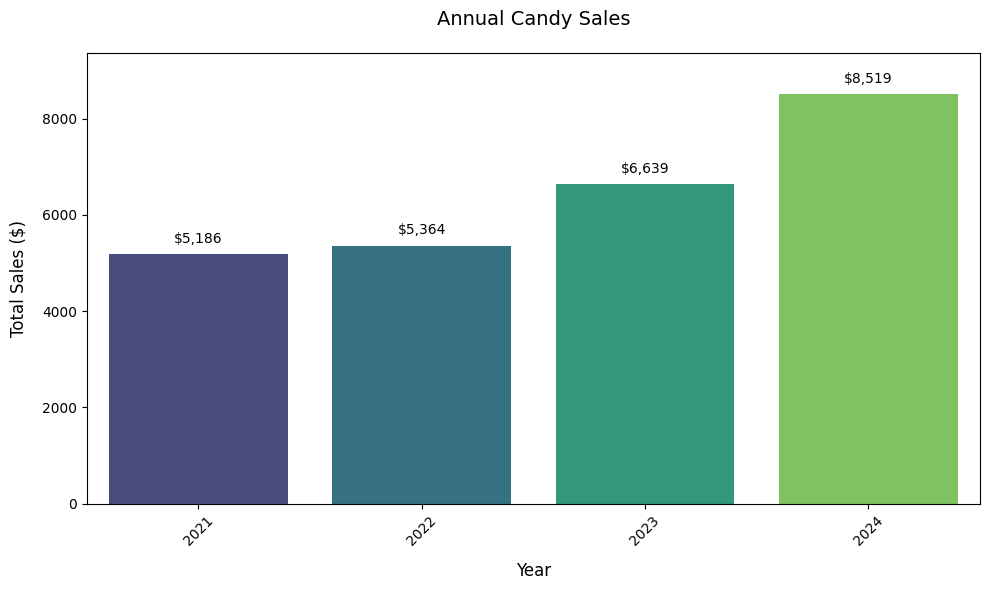

In [71]:
plt.figure(figsize=(10, 6))

# Create plot without grid lines
ax = sns.barplot(x='Year', y='Sales', data=annual_sales, palette='viridis')
ax.grid(False)  # Remove all grid lines

# Formatting
plt.title('Annual Candy Sales', fontsize=14, pad=20)
plt.xlabel('Year', fontsize=12, labelpad=10)
plt.ylabel('Total Sales ($)', fontsize=12, labelpad=10)
plt.xticks(rotation=45)

# Calculate safe label positions
max_sales = annual_sales['Sales'].max()
label_offset = 0.02 * max_sales  # Dynamic offset based on data

# Add perfectly positioned value labels
for index, row in annual_sales.iterrows():
    y_pos = min(row['Sales'] + label_offset, max_sales * 1.05)  # Prevent going off-chart
    ax.text(index, 
            y_pos, 
            f'${row["Sales"]:,.0f}', 
            ha='center', 
            va='bottom',
            fontsize=10)

# Set y-axis limit with buffer
plt.ylim(0, max_sales * 1.1)  # 10% buffer above highest bar



plt.tight_layout()
plt.show()

#### - Sales by State



In [73]:

state_sales = candy_df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(5)
state_sales



State
California      5073.928815
New York        2829.596759
Texas           2472.823162
Pennsylvania    1463.189661
Washington      1260.510145
Name: Sales, dtype: float64

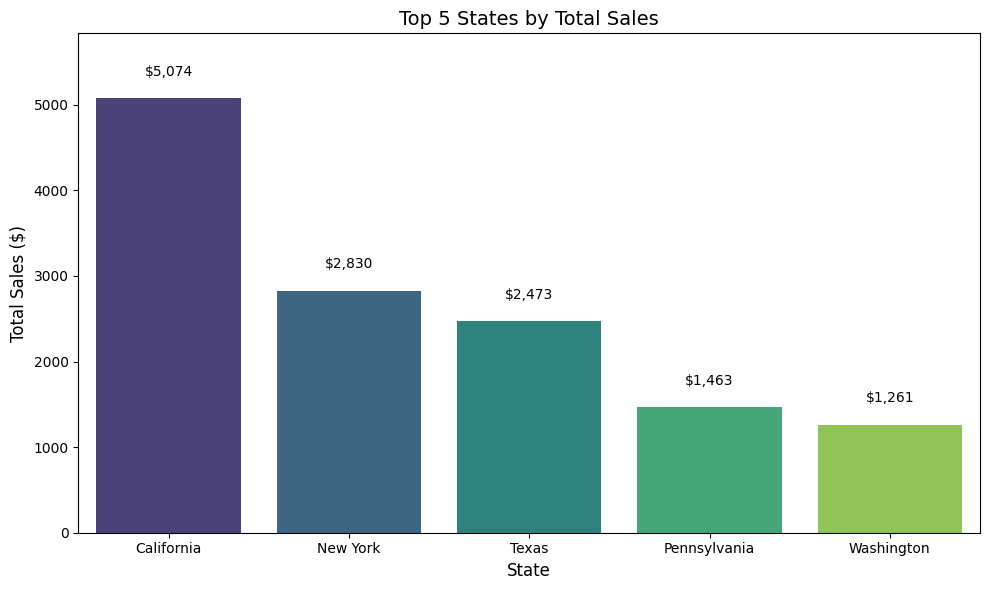

In [74]:

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=state_sales.index, y=state_sales.values, palette='viridis')
ax.grid(False)  # Remove all grid lines
plt.title('Top 5 States by Total Sales', fontsize=14)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Calculate dynamic padding (15% of max value)
y_padding = max(state_sales.values) * 0.15

# Set y-axis limit with padding
plt.ylim(0, max(state_sales.values) + y_padding)

# Add value labels - now positioned better
for i, value in enumerate(state_sales.values):
    ax.text(i,                          # x-position
            value + (y_padding * 0.3),  # y-position (30% of padding)
            f'${value:,.0f}',           # formatted value
            ha='center',                # horizontal alignment
            va='bottom',                # vertical alignment
            fontsize=10)

plt.tight_layout()
plt.show()

In [75]:
#### - Low-Performing Products

In [76]:
low_sales = candy_df.groupby('Product')['Sales'].sum().sort_values().head(5)
low_sales

Product
Fun Dip                    4.566949
Nerds                      5.953243
Everlasting Gobstopper     7.147559
Hair Toffee               11.773586
Fizzy Lifting Drinks      15.679449
Name: Sales, dtype: float64

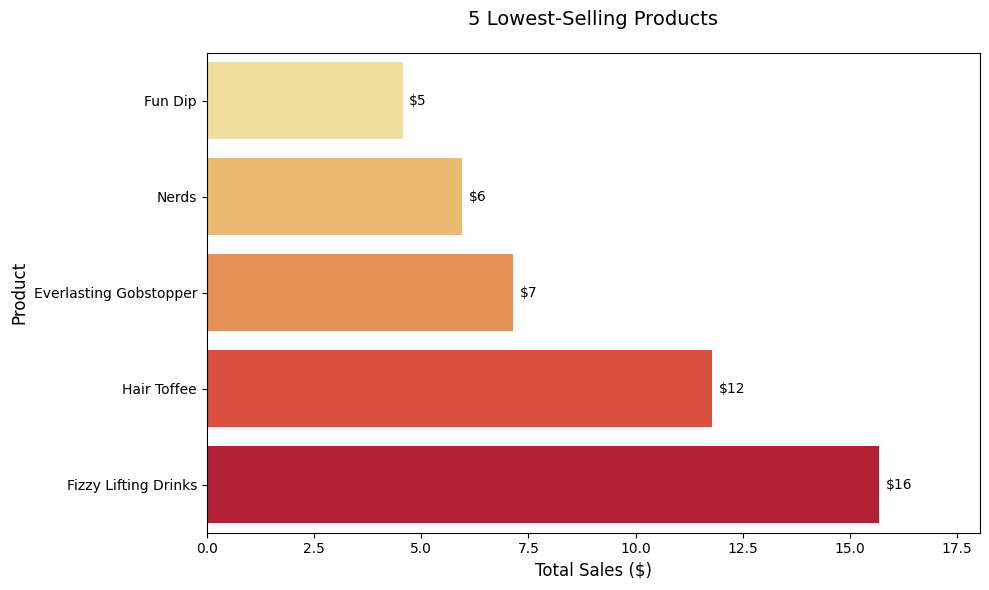

In [77]:
# Get bottom 5 products by sales
low_sales = candy_df.groupby('Product')['Sales'].sum().sort_values().head(5)

# Create figure
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=low_sales.values, y=low_sales.index, palette='YlOrRd', orient='h')


# Formatting
plt.title('5 Lowest-Selling Products', fontsize=14, pad=20)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.xlim(0, max(low_sales) * 1.15)  # Add 15% padding for labels

# Add value labels inside bars
for i, value in enumerate(low_sales):
    ax.text(value + (max(low_sales)*0.01),  # x-position (slightly right of bar)
            i,                             # y-position
            f'${value:,.0f}',              # formatted value
            va='center',                   # vertical alignment
            ha='left',                     # horizontal alignment
            fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.grid(False)
plt.tight_layout()

plt.show()

In [78]:
#### - Profit Margin by Product Category:

In [94]:
product_category = candy_df.groupby('Category')['Sales'].sum()
product_category

Category
Chocolate    24807.564275
Other          835.613869
Sugar           64.759490
Name: Sales, dtype: float64

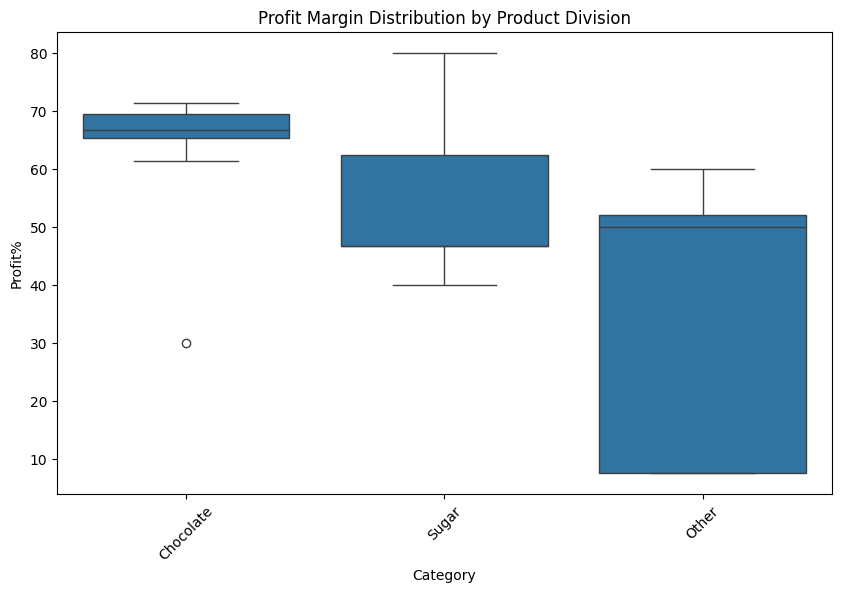

In [79]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Category', y='Profit%', data=candy_df)
plt.title('Profit Margin Distribution by Product Category')
plt.xticks(rotation=45)
plt.show()

#### - Shipping Mode Analysis:

In [81]:
ship_mode = candy_df.groupby('Shipping')['Delivery_Time'].mean()
ship_mode

Shipping
First Class       23.817594
Same Day          21.708791
Second Class      24.839168
Standard Class    26.660606
Name: Delivery_Time, dtype: float64

In [82]:
candy_df['Delivery_Time'].describe()

count    10168.000000
mean        25.609363
std          2.183037
min         15.000000
25%         24.000000
50%         26.000000
75%         27.000000
max         34.000000
Name: Delivery_Time, dtype: float64

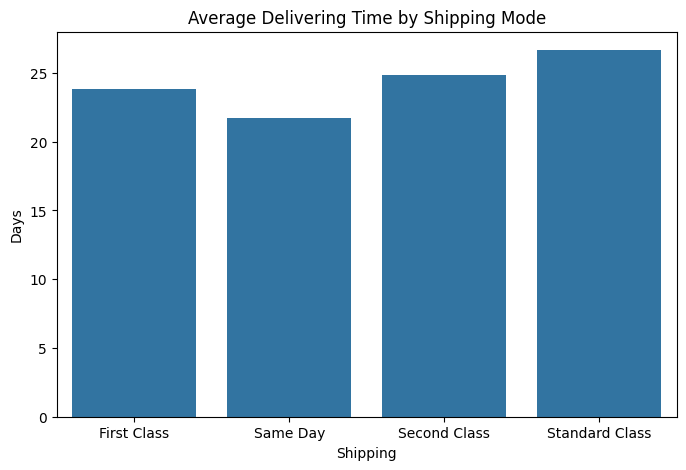

In [83]:
plt.figure(figsize=(8, 5))
sns.barplot(x=ship_mode.index, y=ship_mode.values)
plt.title('Average Delivering Time by Shipping Mode')
plt.ylabel('Days')
plt.show()

#### - Customer Behavior - Customer Order Frequency

In [85]:
customer_orders = candy_df['CustomerID'].value_counts().head(10)

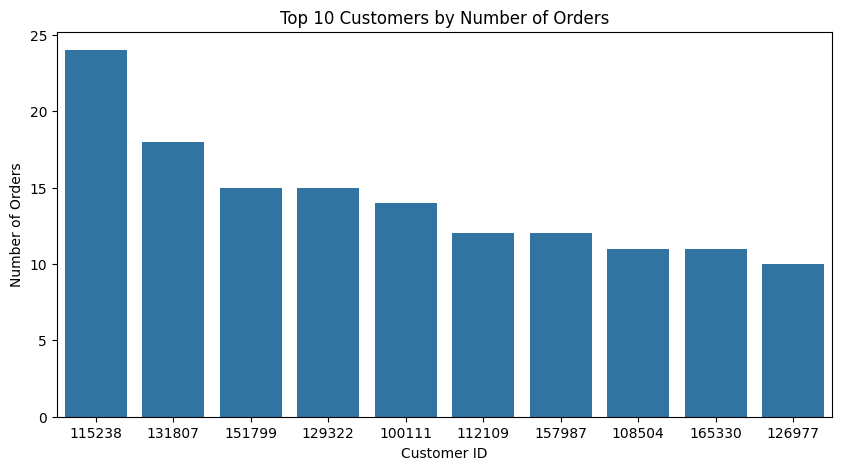

In [86]:
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_orders.index, y=customer_orders.values)
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.show()

In [ ]:
#### Temporal Sales Analysis

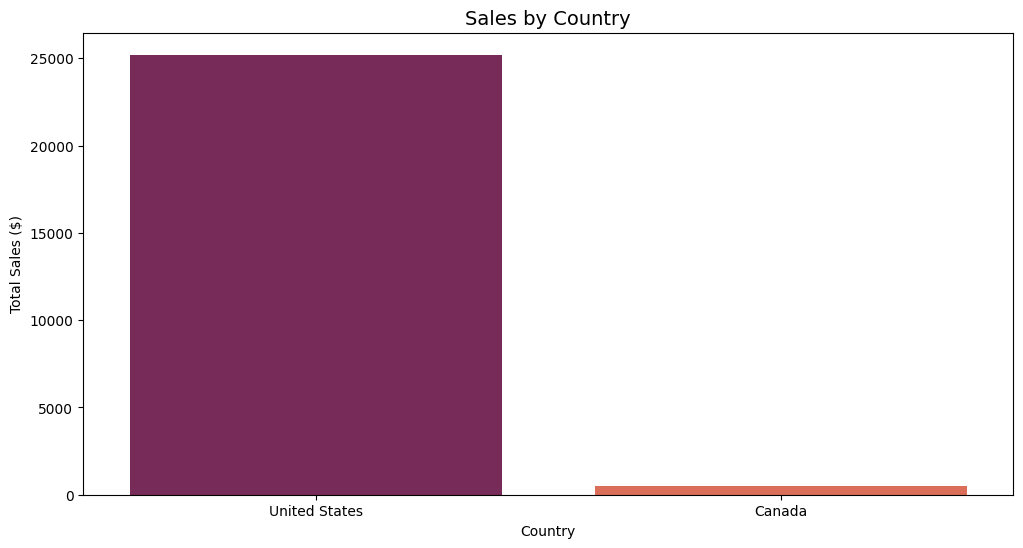

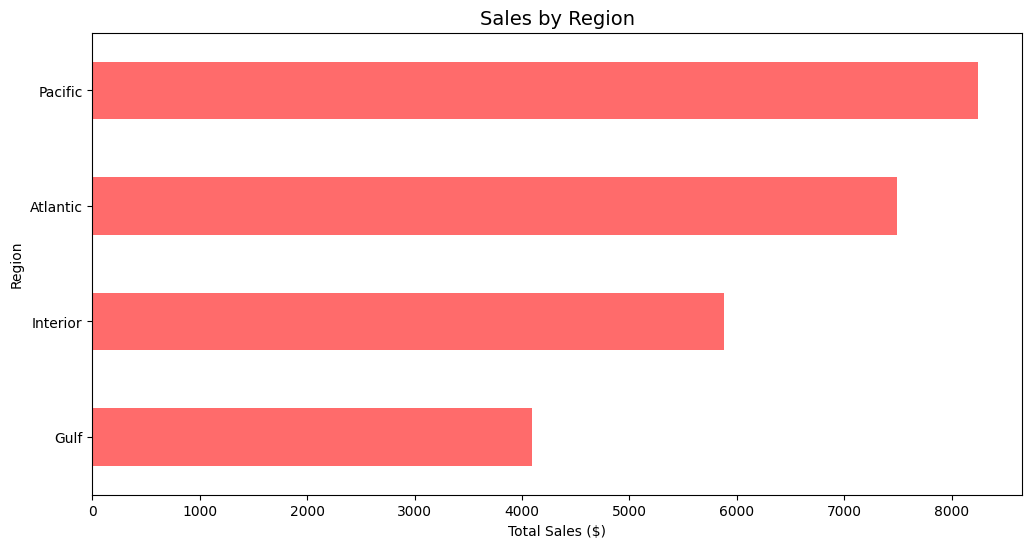

In [132]:
plt.figure(figsize=(12, 6))

# By Country
country_sales = candy_df.groupby('Country')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=country_sales.index, y=country_sales.values, palette='rocket')
plt.title('Sales by Country', fontsize=14)
plt.ylabel('Total Sales ($)')

# By Region (if multiple regions exist)
if len(candy_df['Region'].unique()) > 1:
    plt.figure(figsize=(12, 6))
    region_sales = candy_df.groupby('Region')['Sales'].sum().sort_values()
    region_sales.plot(kind='barh', color='#FF6B6B')
    plt.title('Sales by Region', fontsize=14)
    plt.xlabel('Total Sales ($)')

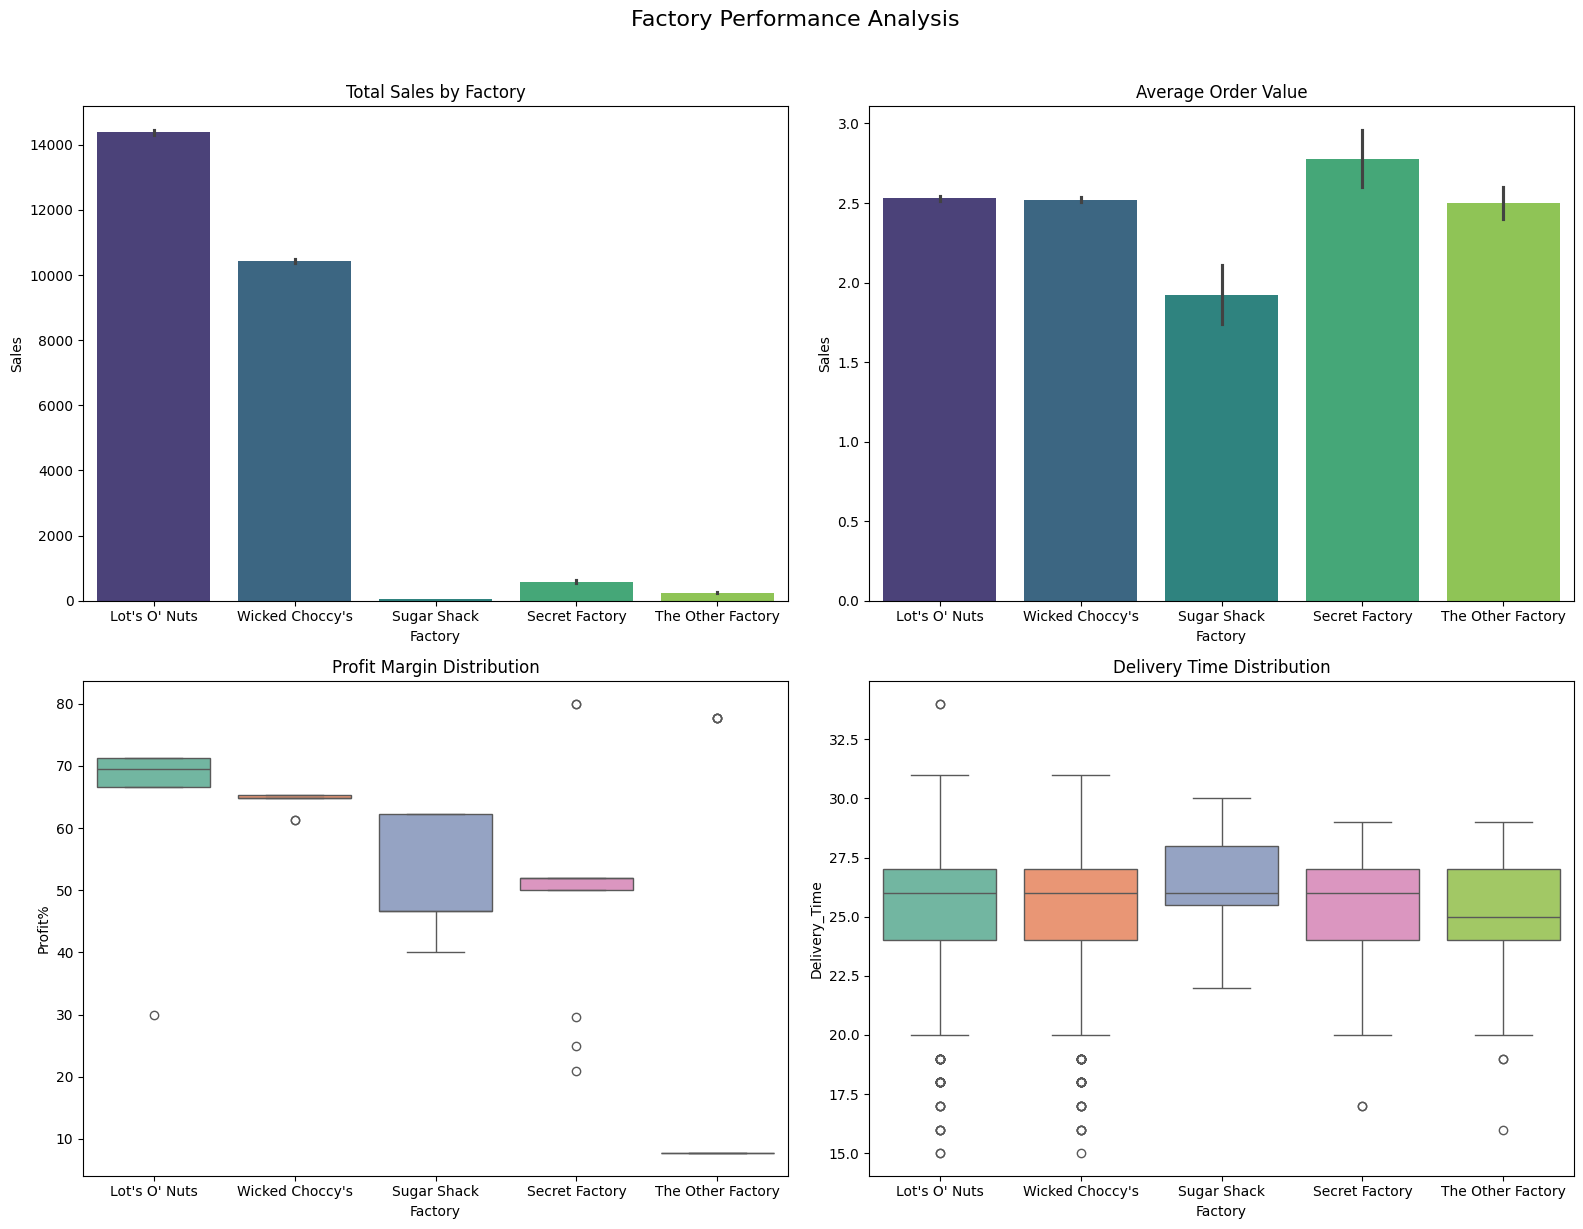

In [122]:
# Factory Comparison Dashboard
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Total Sales
sns.barplot(x='Factory', y='Sales', data=candy_df, 
            estimator=sum, ax=axes[0,0], palette='viridis')
axes[0,0].set_title('Total Sales by Factory')

# Average Order Value
sns.barplot(x='Factory', y='Sales', data=candy_df, 
            estimator=np.mean, ax=axes[0,1], palette='viridis')
axes[0,1].set_title('Average Order Value')

# Profit Margins
sns.boxplot(x='Factory', y='Profit%', data=candy_df, 
            ax=axes[1,0], palette='Set2')
axes[1,0].set_title('Profit Margin Distribution')

# Delivery Performance
sns.boxplot(x='Factory', y='Delivery_Time', data=candy_df, 
            ax=axes[1,1], palette='Set2')
axes[1,1].set_title('Delivery Time Distribution')

plt.suptitle('Factory Performance Analysis', fontsize=16, y=1.02)
plt.tight_layout()

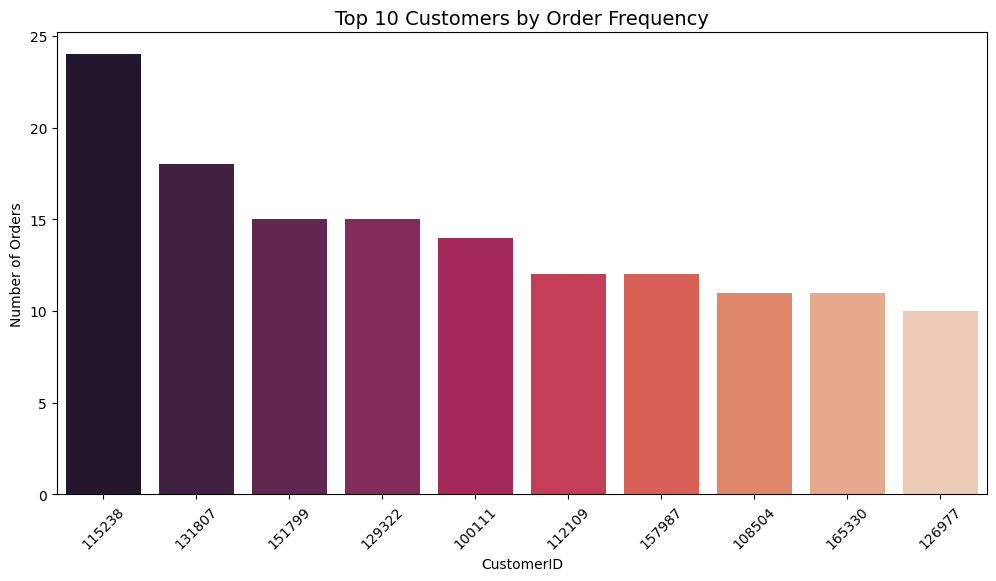

In [128]:
# Top Customers
plt.figure(figsize=(12, 6))
top_customers = candy_df['CustomerID'].value_counts().head(10)
sns.barplot(x=top_customers.index, y=top_customers.values, palette='rocket')
plt.title('Top 10 Customers by Order Frequency', fontsize=14)
plt.ylabel('Number of Orders')
plt.xticks(rotation=45);

Text(0, 0.5, 'Days')

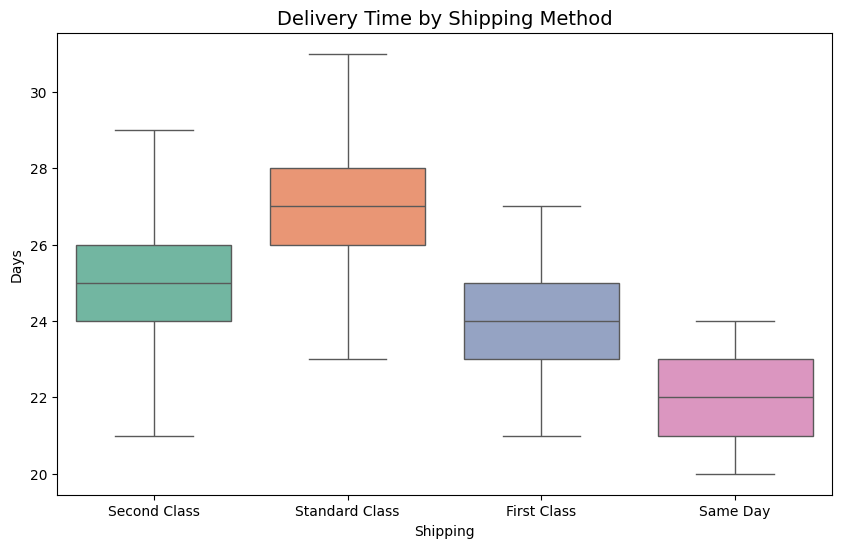

In [114]:
# Shipping Method Efficiency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Shipping', y='Delivery_Time', data=candy_df, 
            palette='Set2', showfliers=False)
plt.title('Delivery Time by Shipping Method', fontsize=14)
plt.ylabel('Days')

Text(0.5, 1.0, 'Feature Correlation Matrix')

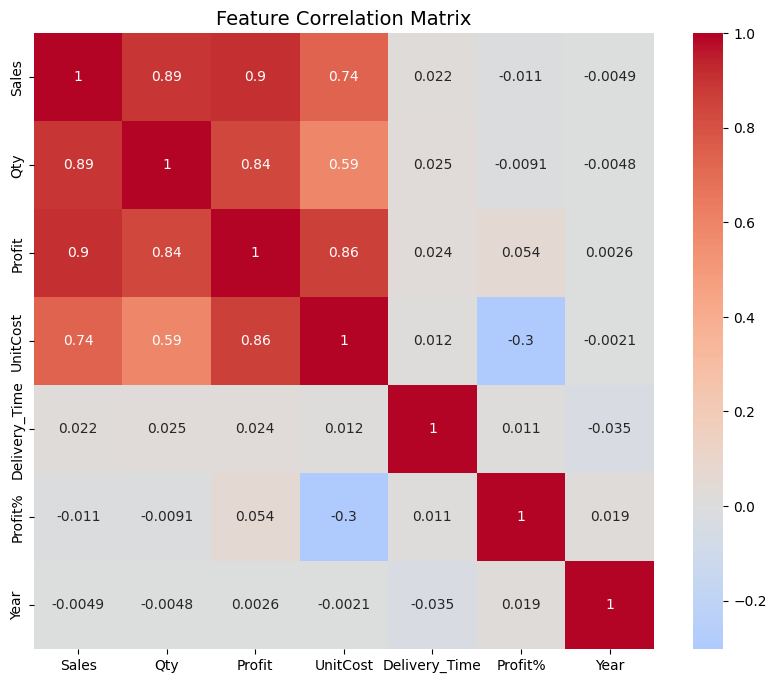

In [110]:
# Numeric Feature Heatmap
plt.figure(figsize=(10, 8))
numeric_df = candy_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix', fontsize=14)

Sales by Factory

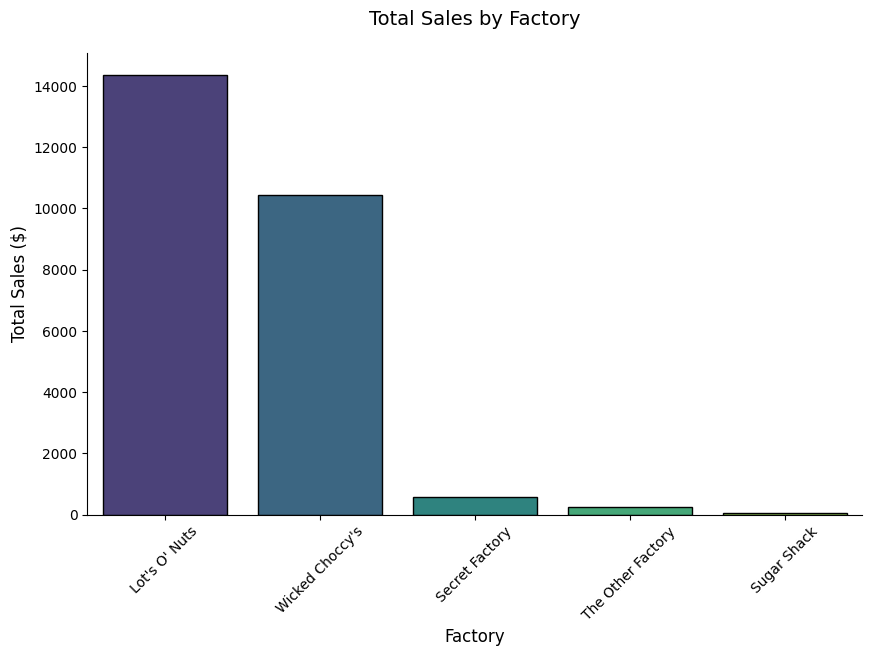

In [104]:
plt.figure(figsize=(10, 6))
sns.barplot(
    x=candy_df.groupby('Factory')['Sales'].sum().sort_values(ascending=False).index,
    y=candy_df.groupby('Factory')['Sales'].sum().sort_values(ascending=False).values,
    palette='viridis',
    edgecolor='black'
)
plt.title('Total Sales by Factory', fontsize=14, pad=20)
plt.xlabel('Factory', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
sns.despine()
plt.show()

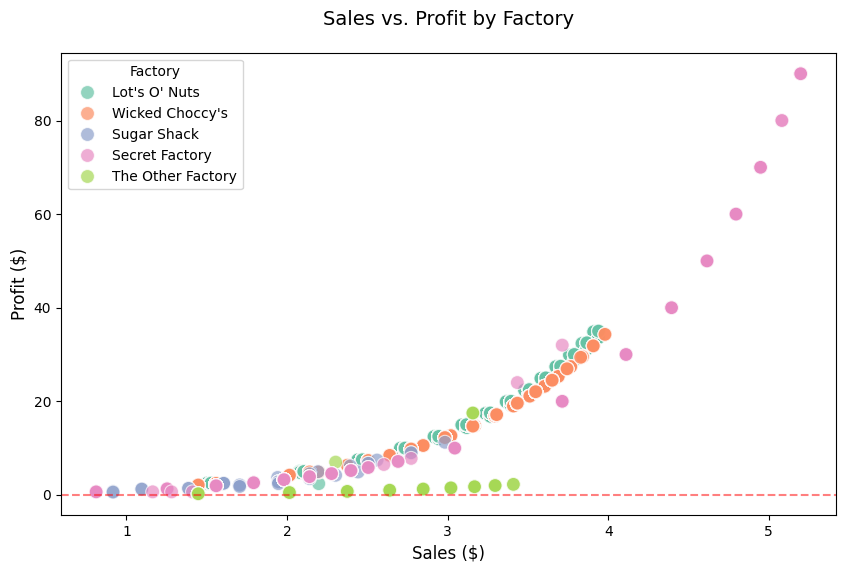

In [106]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Sales',
    y='Profit',
    hue='Factory',
    data=candy_df,
    palette='Set2',
    alpha=0.7,
    s=100
)
plt.title('Sales vs. Profit by Factory', fontsize=14, pad=20)
plt.xlabel('Sales ($)', fontsize=12)
plt.ylabel('Profit ($)', fontsize=12)
plt.axhline(0, color='red', linestyle='--', alpha=0.5)
plt.legend(title='Factory')
plt.show()

- Observation:

The highest correlation is between the order year and shipping year followed by the order month and shipping month which may the signified that the delay rate of shipping is much less


### - Conclusion from the Data Visualization:

We can say that more profitable region is West and East whereas New york and California having highest profitable states.
and in terms of the Product Category Technology is highest but Furniture and Office Supplier are also good there are so many demand in all these product category
And in terms of the month the 9,11,12 are most preferable month maybe due to festive season or holidays

## Hypothesis

#### - H1: "Shipping Mode Impacts Profitability More Than Sales Volume"

- Question: Does choosing a faster shipping method (e.g., "Express") significantly increase gross profit, even if sales volume remains stable?
Why It’s Interesting:

- Faster shipping might reduce cart abandonment or attract premium customers, boosting profit margins despite higher costs.

- Test: Compare average Gross Profit and Cost across Ship Mode categories. Use ANOVA or regression with Ship Mode as a predictor.
- Potential Insight: Optimizing shipping strategies could maximize profitability, not just revenue.

#### - H2: "Customer Loyalty Decays Over Time Without Engagement"

- Question: Do repeat customers (same Customer ID) decrease their purchase frequency or average order value (Sales) over time if there are long gaps between orders?
Why It’s Interesting:

- Identifies critical windows for re-engagement campaigns (e.g., discounts after 30 days of inactivity).

- Test: Calculate time intervals between Order Date for repeat customers. Correlate gaps with Sales or Units trends.
- Potential Insight: Proactive retention strategies could stabilize revenue from high-value customers.

## Time Series analysis

In [ ]:
regions = candy_df['Region'].unique()
shipModes = candy_df['Ship Mode'].unique()
categories = candy_df['Division'].unique()

In [ ]:
plt.figure(5, figsize=(20, 6))
plt.subplots_adjust(wspace=0.1);
#graphing 'Sales' vs. 'Category'
dfbyCatOrderDate = candy_df.groupby(['Division','Order Date'])
plt.subplot(131).title.set_text('Cumulative Number of Sales per Division')
plt.xticks(rotation=90) 
plt.legend()
for cat in categories:
    data = dfbyCatOrderDate['Sales'].count()[cat]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(131))


#graphing 'Sales' vs. 'Ship Mode'
dfbyShipOrderDate = candy_df.groupby(['Ship Mode','Order Date'])
plt.subplot(132).title.set_text('Cumulative Number of Sales per Ship Mode')
plt.xticks(rotation=90)
plt.legend()
for shipMode in shipModes:
    data = dfbyShipOrderDate['Sales'].count()[shipMode]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(132))


#graphing 'Sales' vs. 'Region'
dfbyRegionOrderDate = candy_df.groupby(['Region','Order Date'])
plt.subplot(133).title.set_text('Cumulative Number of Sales per Region')
plt.xticks(rotation=90)
plt.legend()
for region in regions:
    data = dfbyRegionOrderDate['Sales'].count()[region]
    data = data.cumsum()
    sns.lineplot(data=data, ax=plt.subplot(133))

In [ ]:
# Resample by month
monthly_sales = candy_df.resample('M', on='Order_Date')['Sales'].sum()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, marker='o')
plt.title("Monthly Sales", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Total Sales ($)")
plt.grid(True)

#### - Drop Unwanted Features:
As you can see there is Customer ID to train our model so just remove these.
As we have Country, City, State and, Postal Code so insteading of keeping all of these we just keep Postal Code.
Shipping_days and rank columns were just created for the analysis purpose so here I'm dropping these columns.


- Row ID: Arbitrary index (likely redundant with pandas' built-in index).
- Order ID:	Unique identifier (useless for modeling unless tracking specific orders).
- Customer ID:	High cardinality (unique or near-unique values; adds noise without aggregation).
- Postal Code:	Too granular; better replaced with "State/Province" or "Region" for analysis.
- City: it might overlap with State/Province.
- Product Name: Already have Product ID, and It is Unique, machine-readable.


Row ID (100% unique, just an index)

Order ID (85% unique, likely an invoice number)

Country/Region (Only 2 unique values, e.g., "US"/"Canada" – little variance)

Postal Code (High cardinality, overlaps with City/State)
Product Name (15 unique) → Keep if analyzing product trends, else drop (already captured in Product ID).
Order Date/Ship Date → Convert to time-based features (e.g., Days_to_Ship = Ship Date - Order Date), then drop raw dates.

In [ ]:
candy_df.drop(columns=['Row ID', 'Order ID', 'Postal Code', 'City', 'Product ID', 'Customer ID'], inplace=True)

## Data Encoding
Before going to train the model we need to convert object data into appropiated numeric values by using some of the Data encoding techniques
- Key Considerations
Avoid Leakage: Ensure Gross Profit/Cost aren’t used to predict Sales (if they’re derived from it).

Dimensionality: High-cardinality features (City, State) may require feature hashing or embeddings.

In [ ]:
candy_df = pd.get_dummies(candy_df, columns=["Ship Mode", "Division", "Region"])

### - Feature mapping

In [ ]:
candy_df['Ship_encoded'] = train['Ship_Mode'].replace(['Standard Class', 'First Class', 'Second Class', 'Same Day'],[1,2,3,4])
candy_df.sample()

## Data Spliting x_train and y_train
Split the data into two parts for training and testing purpose

In [ ]:
# Separate features (X) and target (y)

X = candy_df.drop("Sales", axis=1)  # All columns except "Sales"
y = candy_df["Sales"]               # Only the "Sales" column

In [ ]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

###  - Scaling the Features 
(important for KNN, Ridge, Lasso). Decision Trees and Random Forest don’t require scaling.

In [ ]:
# Transforming data

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
     

## Implementing Supervised Machine Learning algorithms.

#### 1 - Linear Regression: 
Linear Regression assumes a linear relationship between the input features and the target. It doesn’t require hyperparameter tuning.

In [ ]:
# Fitting Multiple Linear Regression to the Training set

# 1. Create and train the model
lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Make predictions
lr_train_pred = lr.predict(X_train)
lr_test_pred = lr.predict(X_test)

# 3. Calculate performance scores
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)

# 4. Calculate error metrics
lr_train_rmse = math.sqrt(mean_squared_error(y_train, lr_train_pred))
lr_test_rmse = math.sqrt(mean_squared_error(y_test, lr_test_pred))
lr_train_mape = mean_absolute_percentage_error(y_train, lr_train_pred)
lr_test_mape = mean_absolute_percentage_error(y_test, lr_test_pred)

# 5. Print results
print("\nLinear Regression Performance:")
print(f"Training R2: {lr_train_score:.3f}")
print(f"Testing R2: {lr_test_score:.3f}")
print(f"Training RMSE: {lr_train_rmse:.2f}")
print(f"Testing RMSE: {lr_test_rmse:.2f}")
print(f"Training MAPE: {lr_train_mape:.2%}")
print(f"Testing MAPE: {lr_test_mape:.2%}")

#### 2 - Ridge Regression

Ridge Regression (L2 regularization) adds a penalty for large coefficients, which can help prevent overfitting, especially when there are many features.

In [ ]:
# 1. Create and train the model
ridge = Ridge(alpha=1.0)  # Default alpha
ridge.fit(X_train, y_train)

# 2. Make predictions
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

# 3. Calculate performance scores
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)

# 4. Calculate error metrics
ridge_train_rmse = math.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = math.sqrt(mean_squared_error(y_test, ridge_test_pred))
ridge_train_mape = mean_absolute_percentage_error(y_train, ridge_train_pred)
ridge_test_mape = mean_absolute_percentage_error(y_test, ridge_test_pred)

# 5. Print results
print("\nRidge Regression Performance:")
print(f"Training R2: {ridge_train_score:.3f}")
print(f"Testing R2: {ridge_test_score:.3f}")
print(f"Training RMSE: {ridge_train_rmse:.2f}")
print(f"Testing RMSE: {ridge_test_rmse:.2f}")
print(f"Training MAPE: {ridge_train_mape:.2%}")
print(f"Testing MAPE: {ridge_test_mape:.2%}")

#### 2.1 -  Hyperparameter Tuning Ridge Regression

- Ridge is sensitive to feature scales. Always standardize (StandardScaler) before tuning.

In [ ]:
# Define Hyperparameter Grid

alphas = [0.001, 0.01, 0.1, 1, 10, 100]

In [ ]:
#Tune Using GridSearchCV (More Control)

ridge = Ridge()
param_grid = {'alpha': alphas}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best alpha and model
best_alpha = grid_search.best_params_['alpha']
best_ridge = grid_search.best_estimator_
print(f"Best alpha (GridSearchCV): {best_alpha:.3f}")

In [ ]:
# Predictions
ridge_train_pred = best_ridge.predict(X_train)
ridge_test_pred = best_ridge.predict(X_test)

# Metrics
ridge_train_score = best_ridge.score(X_train, y_train)
ridge_test_score = best_ridge.score(X_test, y_test)
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge_train_pred))
ridge_test_rmse = np.sqrt(mean_squared_error(y_test, ridge_test_pred))

print("\nTuned Ridge Regression Performance:")
print(f"Best Alpha: {best_alpha}")
print(f"Training R2: {ridge_train_score:.3f}")
print(f"Testing R2: {ridge_test_score:.3f}")
print(f"Training RMSE: {ridge_train_rmse:.2f}")
print(f"Testing RMSE: {ridge_test_rmse:.2f}")

In [ ]:
# Visualizing Alpha Impact:

coefs = [Ridge(alpha=a).fit(X_train, y_train).coef_ for a in alphas]
plt.plot(alphas, coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficient Magnitude')
plt.title('Ridge Coefficients vs. Alpha')
plt.show()

#### 3 - Random Forest Regression

Random Forest is an ensemble of decision trees, making it more robust by reducing overfitting. It generally provides better performance than a single decision tree.

In [ ]:
# 1. Create and train the model
rf = RandomForestRegressor(random_state=0)
rf.fit(X_train, y_train)

# 2. Make predictions
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

# 3. Calculate performance scores
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)

# 4. Calculate error metrics
rf_train_rmse = math.sqrt(mean_squared_error(y_train, rf_train_pred))
rf_test_rmse = math.sqrt(mean_squared_error(y_test, rf_test_pred))
rf_train_mape = mean_absolute_percentage_error(y_train, rf_train_pred)
rf_test_mape = mean_absolute_percentage_error(y_test, rf_test_pred)

# 5. Print results
print("\nRandom Forest Performance:")
print(f"Training R2: {rf_train_score:.3f}")
print(f"Testing R2: {rf_test_score:.3f}")
print(f"Training RMSE: {rf_train_rmse:.2f}")
print(f"Testing RMSE: {rf_test_rmse:.2f}")
print(f"Training MAPE: {rf_train_mape:.2%}")
print(f"Testing MAPE: {rf_test_mape:.2%}")

#### 3.1 -  Hyperparameter Tuning Random Forest Regression

- We’ll use GridSearchCV (exhaustive search) to find the best hyperparameters.

In [ ]:
# Define the parameter grid  
param_grid = {  
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 5, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 0.8]  
}  

# Initialize the model  
rf = RandomForestRegressor(random_state=0)  

# GridSearchCV (5-fold cross-validation)  
grid_search = GridSearchCV(  
    estimator=rf,  
    param_grid=param_grid,  
    cv=5,  
    scoring='neg_mean_squared_error',  # Minimize RMSE  
    n_jobs=-1  # Use all CPU cores  
)  

# Fit to training data  
grid_search.fit(X_train, y_train)  

# Best parameters  
print("Best Hyperparameters:", grid_search.best_params_) 

In [ ]:
# Train the Optimized Model Use the best parameters  
best_rf = grid_search.best_estimator_  

# Predictions  
rf_train_pred = best_rf.predict(X_train)  
rf_test_pred = best_rf.predict(X_test)  

# Performance metrics  
rf_train_score = best_rf.score(X_train, y_train)  
rf_test_score = best_rf.score(X_test, y_test)  
rf_train_rmse = math.sqrt(mean_squared_error(y_train, rf_train_pred))  
rf_test_rmse = math.sqrt(mean_squared_error(y_test, rf_test_pred))  
rf_train_mape = mean_absolute_percentage_error(y_train, rf_train_pred)  
rf_test_mape = mean_absolute_percentage_error(y_test, rf_test_pred)  

# Print results  
print("\nTuned Random Forest Performance:")  
print(f"Training R2: {rf_train_score:.3f}")  
print(f"Testing R2: {rf_test_score:.3f}")  
print(f"Training RMSE: {rf_train_rmse:.2f}")  
print(f"Testing RMSE: {rf_test_rmse:.2f}")  
print(f"Training MAPE: {rf_train_mape:.2%}")  
print(f"Testing MAPE: {rf_test_mape:.2%}")  

#### 4 - Lasso Regression

Lasso Regression (L1 regularization) similarly penalizes large coefficients but can also set some coefficients to zero, effectively performing feature selection.

In [ ]:
# 1. Create and train the model
lasso = Lasso(alpha=1.0)  # Default alpha
lasso.fit(X_train, y_train)

# 2. Make predictions
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

# 3. Calculate performance scores
lasso_train_score = lasso.score(X_train, y_train)
lasso_test_score = lasso.score(X_test, y_test)

# 4. Calculate error metrics
lasso_train_rmse = math.sqrt(mean_squared_error(y_train, lasso_train_pred))
lasso_test_rmse = math.sqrt(mean_squared_error(y_test, lasso_test_pred))
lasso_train_mape = mean_absolute_percentage_error(y_train, lasso_train_pred)
lasso_test_mape = mean_absolute_percentage_error(y_test, lasso_test_pred)

# 5. Print results
print("\nLasso Regression Performance:")
print(f"Training R2: {lasso_train_score:.3f}")
print(f"Testing R2: {lasso_test_score:.3f}")
print(f"Training RMSE: {lasso_train_rmse:.2f}")
print(f"Testing RMSE: {lasso_test_rmse:.2f}")
print(f"Training MAPE: {lasso_train_mape:.2%}")
print(f"Testing MAPE: {lasso_test_mape:.2%}")

#### 4.1 -  Hyperparameter Tuning  Lasso Regression

In [ ]:
# Define alpha values to test (log-scale is common)
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]  
}

In [ ]:
# Initialize Lasso
lasso = Lasso(max_iter=10000)  # Increase max_iter for convergence

# Setup GridSearchCV
grid_search = GridSearchCV(
    estimator=lasso,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    return_train_score=True
)

# Fit to training data
grid_search.fit(X_train, y_train)

In [ ]:
# Get Best Hyperparameters

best_alpha = grid_search.best_params_['alpha']
print(f"Best alpha: {best_alpha}")

In [ ]:
# Train final Lasso model with best alpha
best_lasso = Lasso(alpha=best_alpha, max_iter=10000)
best_lasso.fit(X_train, y_train)

# Evaluate (same as your original code)
train_pred = best_lasso.predict(X_train)
test_pred = best_lasso.predict(X_test)

train_score = best_lasso.score(X_train, y_train)
test_score = best_lasso.score(X_test, y_test)

train_rmse = math.sqrt(mean_squared_error(y_train, train_pred))
test_rmse = math.sqrt(mean_squared_error(y_test, test_pred))

print("\nTuned Lasso Performance:")
print(f"Best alpha: {best_alpha}")
print(f"Training R2: {train_score:.3f}")
print(f"Testing R2: {test_score:.3f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")

In [ ]:
# Extract results from GridSearchCV
alphas = grid_search.cv_results_['param_alpha'].data
test_scores = -grid_search.cv_results_['mean_test_score']  # Convert back to MSE

# Plot
plt.figure(figsize=(8, 4))
plt.semilogx(alphas, test_scores, marker='o')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Lasso Alpha Tuning')
plt.grid()
plt.show()

#### 5 - Decision Tree Regression

Decision Trees partition the feature space into regions and fit simple models in each region. They work well for non-linear data but may overfit if not properly tuned.

In [ ]:
# 1. Create and train the model
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

# 2. Make predictions
dt_train_pred = dt.predict(X_train)
dt_test_pred = dt.predict(X_test)

# 3. Calculate performance scores
dt_train_score = dt.score(X_train, y_train)
dt_test_score = dt.score(X_test, y_test)

# 4. Calculate error metrics
dt_train_rmse = math.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_test_rmse = math.sqrt(mean_squared_error(y_test, dt_test_pred))
dt_train_mape = mean_absolute_percentage_error(y_train, dt_train_pred)
dt_test_mape = mean_absolute_percentage_error(y_test, dt_test_pred)

# 5. Print results
print("\nDecision Tree Performance:")
print(f"Training R2: {dt_train_score:.3f}")
print(f"Testing R2: {dt_test_score:.3f}")
print(f"Training RMSE: {dt_train_rmse:.2f}")
print(f"Testing RMSE: {dt_test_rmse:.2f}")
print(f"Training MAPE: {dt_train_mape:.2%}")
print(f"Testing MAPE: {dt_test_mape:.2%}")

#### 5.1 - Hyperparameter Tuning Decision Tree

In [ ]:
# Define Hyperparameter Grid

param_grid = {
    'max_depth': [3, 5, 7, None],  # None = unlimited
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.8]  # 80% of features
}

In [ ]:
#Initialize Grid Search

dt = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Maximizes -RMSE (higher is better)
    n_jobs=-1  # Uses all CPU cores
)

In [ ]:
#  Fit and Find Best Parameters

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



In [ ]:
# Train with Optimized Parameters

best_dt = DecisionTreeRegressor(**best_params, random_state=0)
best_dt.fit(X_train, y_train)

In [ ]:
#Evaluate Performance

# Predictions
dt_train_pred = best_dt.predict(X_train)
dt_test_pred = best_dt.predict(X_test)

# Scores
dt_train_score = best_dt.score(X_train, y_train)
dt_test_score = best_dt.score(X_test, y_test)

# Error Metrics
dt_train_rmse = math.sqrt(mean_squared_error(y_train, dt_train_pred))
dt_test_rmse = math.sqrt(mean_squared_error(y_test, dt_test_pred))
dt_train_mape = mean_absolute_percentage_error(y_train, dt_train_pred)
dt_test_mape = mean_absolute_percentage_error(y_test, dt_test_pred)

# Print Results
print("\nTuned Decision Tree Performance:")
print(f"Training R2: {dt_train_score:.3f}")
print(f"Testing R2: {dt_test_score:.3f}")
print(f"Training RMSE: {dt_train_rmse:.2f}")
print(f"Testing RMSE: {dt_test_rmse:.2f}")
print(f"Training MAPE: {dt_train_mape:.2%}")
print(f"Testing MAPE: {dt_test_mape:.2%}")

#### 6 - K-Nearest Neighbors Regression

KNN Regression makes predictions based on the average of the nearest neighbors in the feature space. It works well for small datasets and when relationships are non-linear.

In [ ]:
# 1. Create and train the model
knn = KNeighborsRegressor(n_neighbors=5)  # Default k=5
knn.fit(X_train, y_train)

# 2. Make predictions
knn_train_pred = knn.predict(X_train)
knn_test_pred = knn.predict(X_test)

# 3. Calculate performance scores
knn_train_score = knn.score(X_train, y_train)
knn_test_score = knn.score(X_test, y_test)

# 4. Calculate error metrics
knn_train_rmse = math.sqrt(mean_squared_error(y_train, knn_train_pred))
knn_test_rmse = math.sqrt(mean_squared_error(y_test, knn_test_pred))
knn_train_mape = mean_absolute_percentage_error(y_train, knn_train_pred)
knn_test_mape = mean_absolute_percentage_error(y_test, knn_test_pred)

# 5. Print results
print("\nKNN Regression Performance:")
print(f"Training R2: {knn_train_score:.3f}")
print(f"Testing R2: {knn_test_score:.3f}")
print(f"Training RMSE: {knn_train_rmse:.2f}")
print(f"Testing RMSE: {knn_test_rmse:.2f}")
print(f"Training MAPE: {knn_train_mape:.2%}")
print(f"Testing MAPE: {knn_test_mape:.2%}")

#### 6.1 -  Hyperparameter Tuning KNN Regression

In [ ]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15],  # Test different k values
    'weights': ['uniform', 'distance'],  # Weighting strategies
    'p': [1, 2]                         # Distance metrics (Manhattan/Euclidean)
}

In [ ]:
# Initialize KNN and GridSearchCV
knn = KNeighborsRegressor()
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,               # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Minimize MSE
    verbose=1,
    n_jobs=-1           # Use all CPU cores
)

# Fit to training data
grid_search.fit(X_train, y_train)

In [ ]:
# Best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Best model
best_knn = grid_search.best_estimator_

In [ ]:
# Predictions
knn_train_pred = best_knn.predict(X_train)
knn_test_pred = best_knn.predict(X_test)

# Performance metrics
knn_train_score = best_knn.score(X_train, y_train)
knn_test_score = best_knn.score(X_test, y_test)
knn_train_rmse = math.sqrt(mean_squared_error(y_train, knn_train_pred))
knn_test_rmse = math.sqrt(mean_squared_error(y_test, knn_test_pred))

print("\nOptimized KNN Performance:")
print(f"Training R2: {knn_train_score:.3f}")
print(f"Testing R2: {knn_test_score:.3f}")
print(f"Training RMSE: {knn_train_rmse:.2f}")
print(f"Testing RMSE: {knn_test_rmse:.2f}")

## Comparing Models Performance 

In [ ]:
# Step 1: Collect the results in a dictionary
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression',
          'Decision Tree', 'Random Forest', 'KNN Regression']

mse_values = [mse, mse_ridge, mse_lasso, mse_dt, mse_rf, mse_knn]
r2_values = [r2, r2_ridge, r2_lasso, r2_dt, r2_rf, r2_knn]

# Step 2: Plot MSE
plt.figure(figsize=(10, 6))
plt.bar(models, mse_values, color='blue')
plt.title('Mean Squared Error (MSE) Comparison')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

# Step 3: Plot R2
plt.figure(figsize=(10, 6))
plt.bar(models, r2_values, color='green')
plt.title('R-Squared (R2) Comparison')
plt.xlabel('Models')
plt.ylabel('R2')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


In [ ]:
### - Comparison table

In [ ]:
# Create comparison table
results = pd.DataFrame({
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics,
    'SVR': svr_metrics
}).T

print("\n\nModel Comparison:")
print(results[['test_r2', 'test_rmse', 'test_mape']].sort_values('test_r2', ascending=False))

In [ ]:
candy_df